In [33]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
import scienceplots    

from frequency_kstest_one_sided import FrequencyKSTestOneSided

np.random.seed(42)
plt.style.use(['no-latex', 'ieee'])

In [34]:
def select_alpha_gst_obrien_fleming(n, N, alpha, rho=0.5):
    t = n / N
    return 4 - 4 * sp.stats.norm.cdf(
            sp.stats.norm.ppf(1 - alpha / 4) / t ** (rho / 2)
        )


In [35]:
def bonferroni_correction(N_peek, alpha):
    return alpha / N_peek

In [36]:
def test_stop_sequential_bounds(treated_data, control_data, n, alpha):
    for i in range(5, n, 5):
        p_value = FrequencyKSTestOneSided.p_value(treated_data[:i], control_data[:i], avi=True)

        if p_value < alpha:
            return i
    return n

In [37]:
def test_stop_gst_bounds(treated_data, control_data, n, estimated_n, alpha):
    for i in range(5, n, 5):
        p_value = FrequencyKSTestOneSided.p_value(treated_data[:i], control_data[:i])
        if p_value < select_alpha_gst_obrien_fleming(i, estimated_n, alpha):
            return i
    return n

In [38]:
def test_stop_bonferroni(treated_data, control_data, n, alpha):
    N_peek = n / 5
    for i in range(5, n, 5):
        p_value = FrequencyKSTestOneSided.p_value(treated_data[:i], control_data[:i])
        if p_value < bonferroni_correction(N_peek, alpha):
            return i
    return n


In [39]:
def test_reject_number(n, alpha, effect_size):
    results_bonferroni = []
    results_avi = []
    results_gst = []
    results_gst_overestimated_2 = []
    results_gst_overestimated_5 = []

    for i in range(1, 100):
        treated_data = np.random.normal(effect_size, 1, n)
        control_data = np.random.normal(0, 1, n)
        results_bonferroni.append(test_stop_bonferroni(treated_data, control_data, n, alpha))
        results_avi.append(test_stop_sequential_bounds(treated_data, control_data, n, alpha))
        results_gst.append(test_stop_gst_bounds(treated_data, control_data, n, n, alpha))
        results_gst_overestimated_2.append(test_stop_gst_bounds(treated_data, control_data, n , n * 2, alpha))
        results_gst_overestimated_5.append(test_stop_gst_bounds(treated_data, control_data, n, n * 5, alpha))

    print("Bonferroni: ", np.mean(results_bonferroni))
    print("AVI: ", np.mean(results_avi))
    print("GST 1x: ", np.mean(results_gst))
    print("GST 2x: ", np.mean(results_gst_overestimated_2))
    print("GST 5x: ", np.mean(results_gst_overestimated_5))
    
    return np.mean(results_bonferroni), np.mean(results_avi), np.mean(results_gst), np.mean(results_gst_overestimated_2), np.mean(results_gst_overestimated_5)



Effect size:  0.1
Bonferroni:  500.0
AVI:  500.0
GST 1x:  500.0
GST 2x:  500.0
GST 5x:  500.0
Effect size:  0.2
Bonferroni:  500.0
AVI:  500.0
GST 1x:  480.25252525252523
GST 2x:  496.9191919191919
GST 5x:  500.0
Effect size:  0.3
Bonferroni:  496.9191919191919
AVI:  500.0
GST 1x:  423.989898989899
GST 2x:  468.030303030303
GST 5x:  495.2020202020202
Effect size:  0.4
Bonferroni:  461.16161616161617
AVI:  500.0
GST 1x:  316.16161616161617
GST 2x:  375.65656565656565
GST 5x:  452.82828282828285
Effect size:  0.5
Bonferroni:  347.27272727272725
AVI:  494.24242424242425
GST 1x:  222.77777777777777
GST 2x:  273.989898989899
GST 5x:  360.3030303030303
Effect size:  0.6
Bonferroni:  270.0
AVI:  452.37373737373736
GST 1x:  184.6969696969697
GST 2x:  225.2020202020202
GST 5x:  295.45454545454544
Effect size:  0.7
Bonferroni:  201.8181818181818
AVI:  366.969696969697
GST 1x:  152.92929292929293
GST 2x:  186.56565656565655
GST 5x:  243.3838383838384
Effect size:  0.8
Bonferroni:  157.12121212121

Text(0, 0.5, 'Number of samples needed')

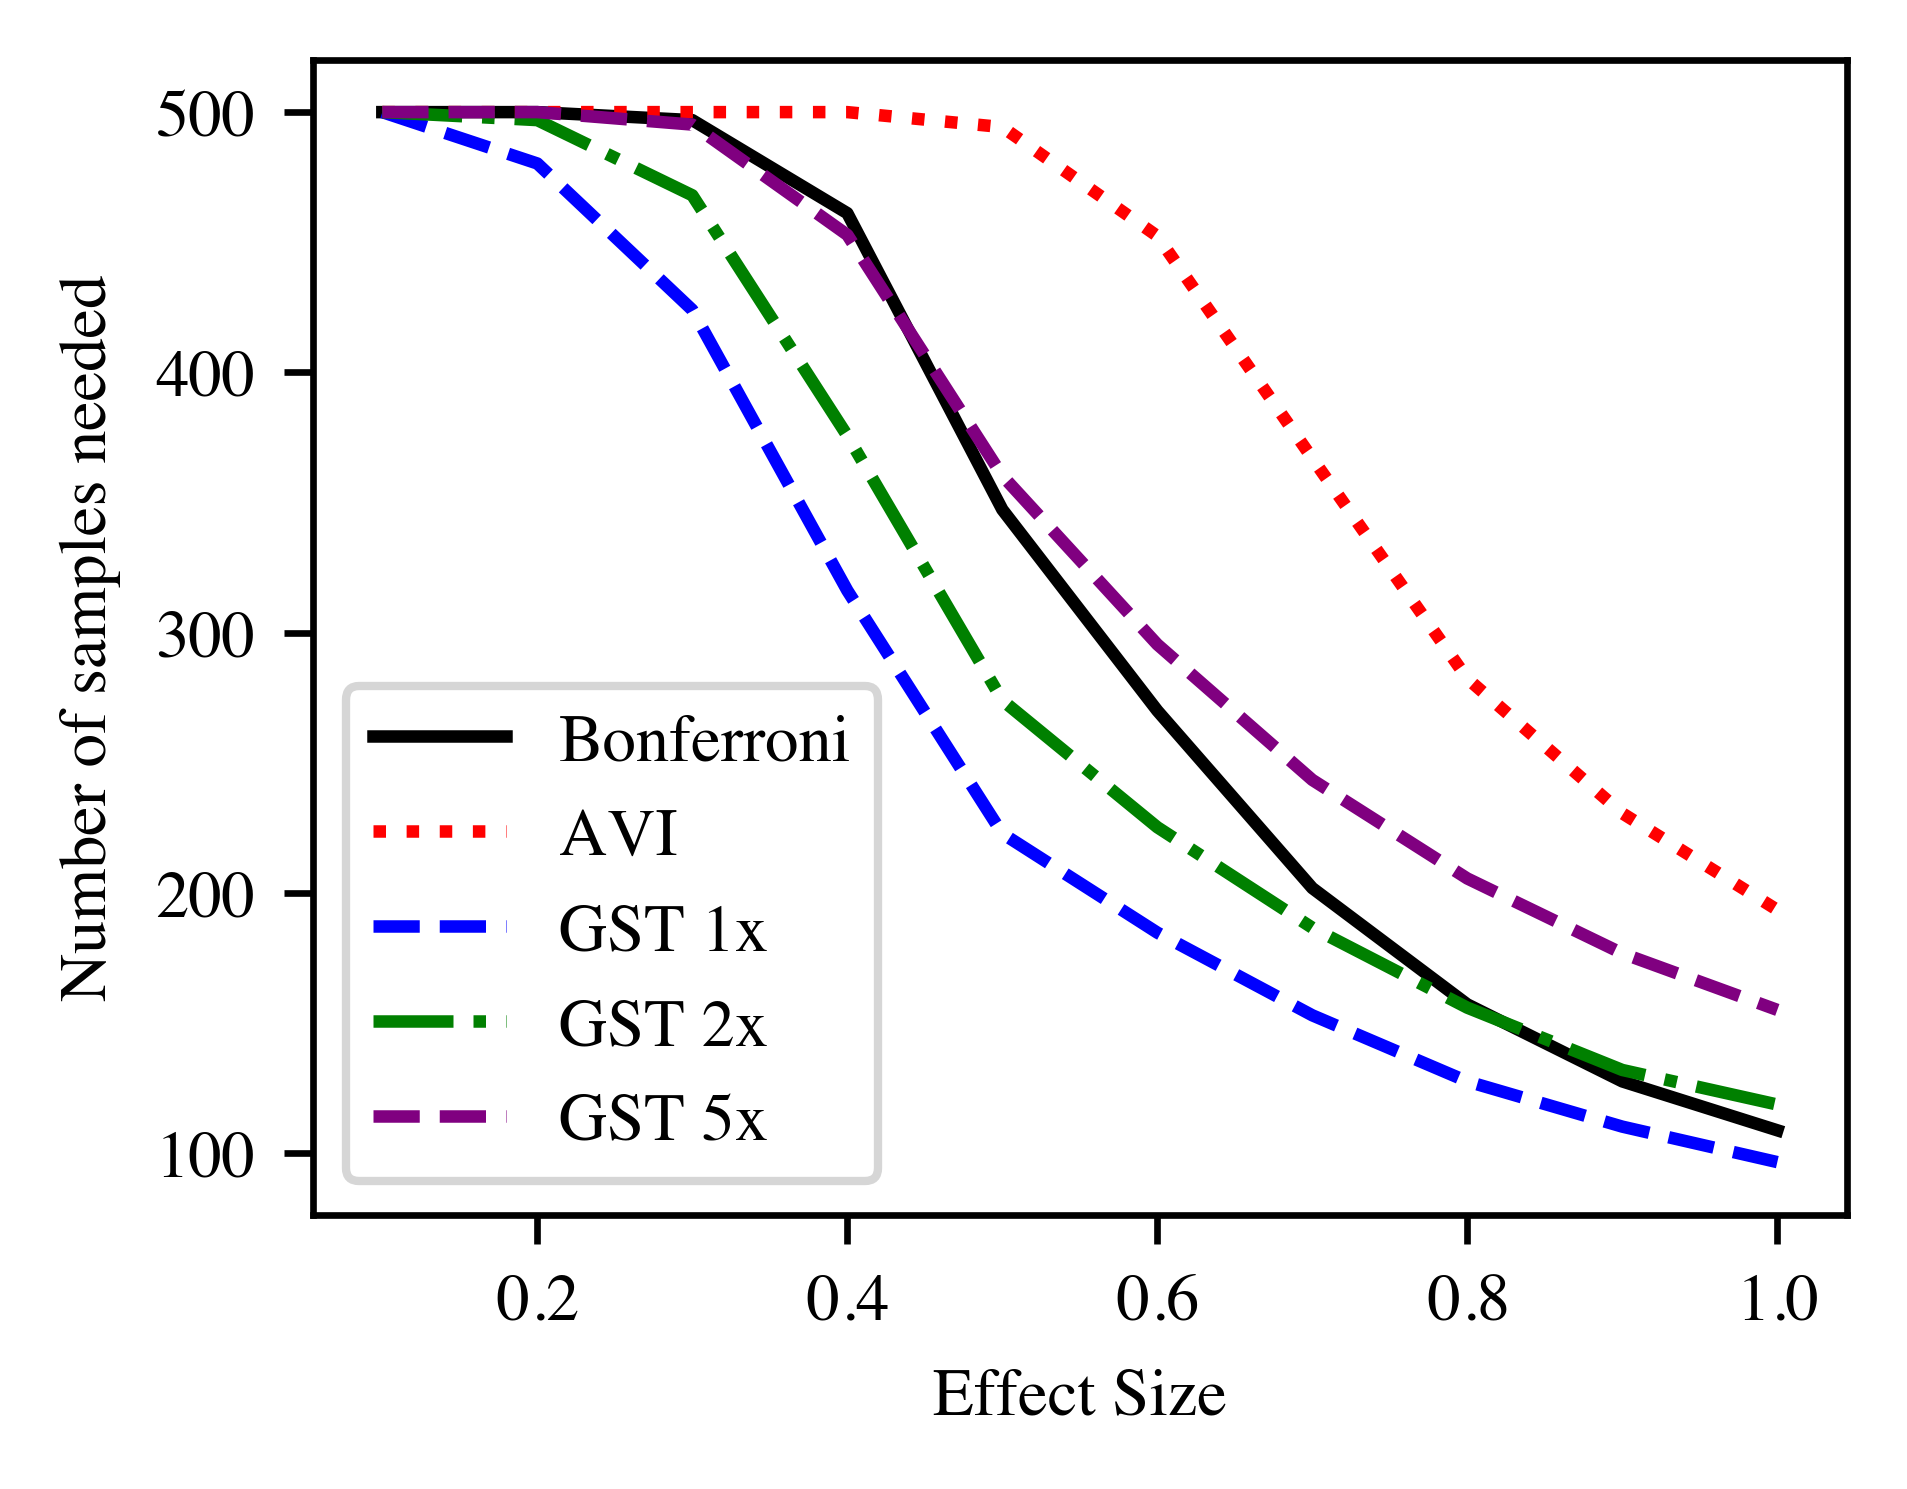

In [40]:
bonferroni = []
avi = []
gst = []
gst_overestimated_2 = []
gst_overestimated_5 = []

effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for effect_size in effect_sizes:
    print("Effect size: ", effect_size)
    results_bonferroni, results_avi, results_gst, results_gst_overestimated_2, results_gst_overestimated_5 = test_reject_number(500, 0.05, effect_size)
    bonferroni.append(results_bonferroni)
    avi.append(results_avi)
    gst.append(results_gst)
    gst_overestimated_2.append(results_gst_overestimated_2)
    gst_overestimated_5.append(results_gst_overestimated_5)

plt.plot(effect_sizes, bonferroni, label="Bonferroni", linestyle='solid', color='black')
plt.plot(effect_sizes, avi, label="AVI", linestyle='dotted', color='red')
plt.plot(effect_sizes, gst, label="GST 1x", linestyle='dashed', color='blue')
plt.plot(effect_sizes, gst_overestimated_2, label="GST 2x", linestyle='dashdot', color='green')
plt.plot(effect_sizes, gst_overestimated_5, label="GST 5x", linestyle='--', color='purple')
plt.legend()
plt.xlabel("Effect Size")
plt.ylabel("Number of samples needed")